### Prediction Using Logistic Regression

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('datasets_180_408_data.csv')

In [3]:
df=df.drop(['Unnamed: 32'],axis=1)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
Y=pd.DataFrame(df['diagnosis'].values,columns=['diagnosis'])

In [6]:
y=Y.values

In [7]:
X=df.drop(['diagnosis','id'],axis=1)

In [9]:
x=X.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scale=scaler.fit(X_train)

In [15]:
X_train_scaled=scale.transform(X_train)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [19]:
model.fit(X_train_scaled, y_train)

/home/abhijit/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
x_test_scaled=scale.transform(X_test)

In [22]:
y_pred=model.predict(x_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred)

0.9787234042553191

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
import numpy as np
i=0
y_pred_i=[]
y_test_i=[]
while i<len(y_pred):
    if y_pred[i]=='M':
        y_pred_i.append([1])
    else:
        y_pred_i.append([0])
    i+=1
y_pred_n=np.array(y_pred_i)
i=0
while i<len(y_pred):
    if y_test[i]=='M':
        y_test_i.append([1])
    else:
        y_test_i.append([0])
    i+=1
y_test_n=np.array(y_test_i)

roc_auc_score(y_test_n, y_pred_n)

0.9801406192179598

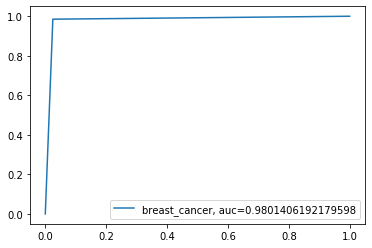

In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test_n,  y_pred_n)
auc = metrics.roc_auc_score(y_test_n, y_pred_n)
plt.plot(fpr,tpr,label="breast_cancer, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
from sklearn.metrics import precision_recall_curve

In [40]:
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)

plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

plt.show()

ImportError: cannot import name 'plot_precision_recall_curve'